<a href="https://colab.research.google.com/github/vanyaagarwal29/Machine_Learning_Algorithms/blob/main/Linear_Regression%2CLasso_and_Ridge_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns



In [7]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data,columns=housing.feature_names)

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df['Price']=housing.target

In [10]:
df.head(

)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [12]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
df.shape

(20640, 9)

In [14]:
df_copy=df.sample(frac=0.25)

In [15]:
df_copy.shape

(5160, 9)

In [16]:
df_copy.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
8722,5.7654,35.0,5.755474,1.018248,743.0,2.711679,33.84,-118.36,3.43000
1425,2.3152,10.0,3.405594,1.104895,631.0,2.206294,37.97,-122.04,1.40600
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
13978,3.9028,52.0,12.901887,2.932075,710.0,2.679245,34.08,-116.88,1.28600
13658,4.5066,7.0,4.659574,0.952719,1336.0,3.158392,34.06,-117.29,1.11500


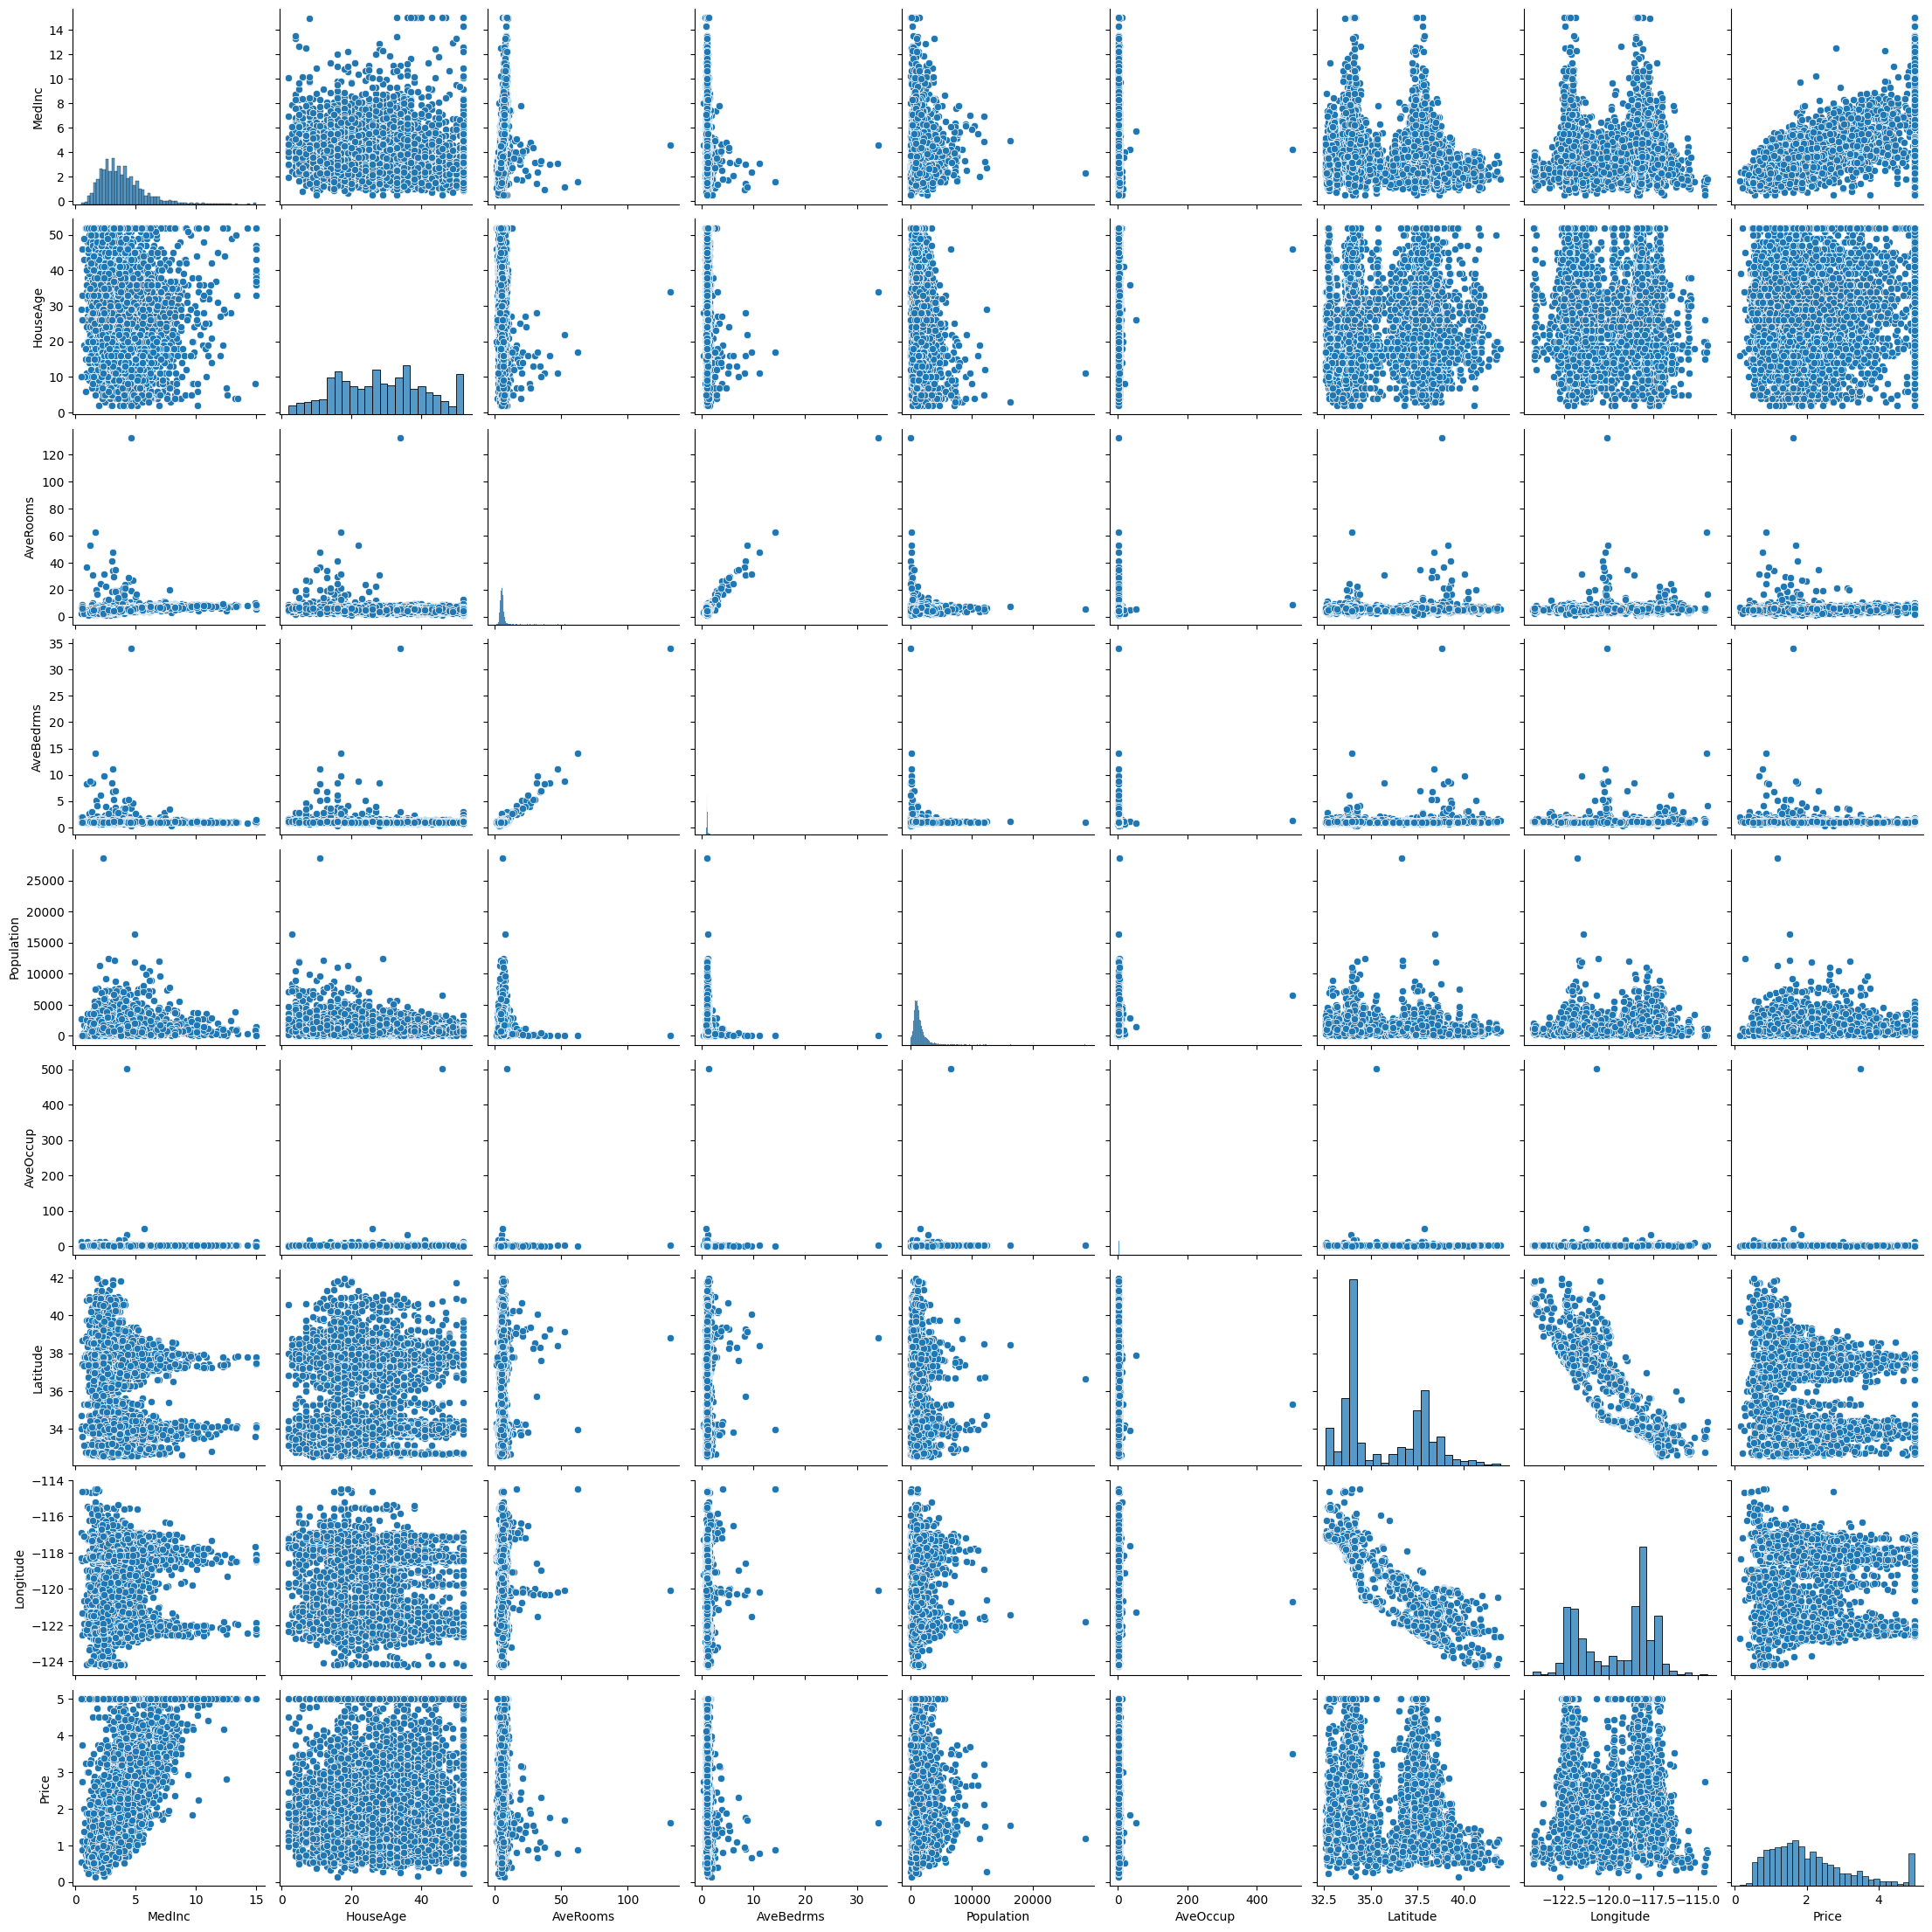

In [19]:
sns.pairplot(df_copy)

In [22]:
## Divide  the dataset into independent and dependent
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=36)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
scaler.fit(X_train)

StandardScaler()

In [26]:
X_train=scaler.fit_transform(X_train)

In [27]:
X_test=scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regression=LinearRegression()

In [30]:
regression.fit(X_train,y_train)

LinearRegression()

In [31]:
regression.coef_

array([ 0.83700024,  0.12271899, -0.26347102,  0.30713139, -0.0081633 ,
       -0.02764702, -0.90609856, -0.87576409])

In [32]:
regression.intercept_

2.0708259184263804

In [33]:
## prediction
y_pred=regression.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [35]:
import numpy as np
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

0.5335029155157139
0.5408989481794169
0.730412839095613


In [36]:
## Accuracy r2 and adjusted r square
from sklearn.metrics import r2_score

In [37]:
score=r2_score(y_test,y_pred)

In [38]:
score

0.5875394343499214

In [39]:
#display adjusted R-squared
1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

0.5873794961731389

### Ridge


In [40]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=20.0)
ridge.fit(X_train,y_train)

Ridge(alpha=20.0)

In [41]:
y_pred=ridge.predict(X_test)

In [42]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

0.5335706984910803
0.5408065397594833
0.7304592380763489


### Lasso

In [43]:
from sklearn.linear_model import Lasso

In [44]:
lasso=Lasso(alpha=20.0)
lasso.fit(X_train,y_train)

Lasso(alpha=20.0)

In [45]:
y_pred=lasso.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

1.2935112672240048
0.9000629779192262
1.1373263679454568


### Elastic Net

In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
elasticnet=ElasticNet(alpha=20.0)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=20.0)

In [48]:
y_pred=elasticnet.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

1.2935112672240048
0.9000629779192262
1.1373263679454568
